В архиве во вложении данные по выдачам кредитов и платежам: плановым и фактическим. Данные актуальны на 08.12.2022. Проанализируйте характер поведения клиентов с точки зрения просрочки: какая динамика просрочки, наблюдается ли рост или снижение?

> Несостыковки в данных можно трактовать на свое усмотрение и отразить в отчете.

* order_id – номер заявки
* created_at - дата создания заявки
* put_at - дата выдачи
* closed_at - дата закрытия
* issued_sum - сумма выдачи
* plan_at - дата планового платежа
* plan_sum_total - сумма планового платежа (накопленным итогом)
* paid_at - дата фактического платежа
* paid_sum - сумма фактического платежа

Инструменты: python, jupyter notebook

ПРИМЕЧАНИЯ:

Просрочка — это нарушение должником сроков и/или объёмов исполнения обязательств, предусмотренных договором (графиком платежей).

In [ ]:
!wget https://raw.githubusercontent.com/mishandri/Data-Analysis/refs/heads/main/tests/Devim/orders.csv
!wget https://raw.githubusercontent.com/mishandri/Data-Analysis/refs/heads/main/tests/Devim/payments.csv
!wget https://raw.githubusercontent.com/mishandri/Data-Analysis/refs/heads/main/tests/Devim/plan.csv

In [ ]:
import pandas as pd

orders = pd.read_csv('orders.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0


In [ ]:
payments = pd.read_csv('payments.csv')
payments.info()
payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  143284 non-null  int64  
 1   paid_at   143284 non-null  object 
 2   paid_sum  143284 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0


In [ ]:
plan = pd.read_csv('plan.csv')
plan.info()
plan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        420282 non-null  int64  
 1   plan_at         420282 non-null  object 
 2   plan_sum_total  420282 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ MB


,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0


Для удобства вычислений переведём даты в формат `date`, так как просрочка будет считаться в днях.

In [ ]:
orders['created_at'] = pd.to_datetime(orders['created_at']).dt.date
orders['put_at'] = pd.to_datetime(orders['put_at']).dt.date
orders['closed_at'] = pd.to_datetime(orders['closed_at']).dt.date
payments['paid_at'] = pd.to_datetime(payments['paid_at']).dt.date
plan['plan_at'] = pd.to_datetime(plan['plan_at']).dt.date

Также для удобства работы выполним денормализацию и объединим таблицы по `order_id`. Основаня таблица orders, поэтом воспользуемся left-join'ом

In [ ]:
data = pd.merge(orders, plan, on='order_id', how='left')
data = pd.merge(data, payments, on='order_id', how='left')
data.head()

,order_id,created_at,put_at,closed_at,issued_sum,plan_at,plan_sum_total,paid_at,paid_sum
0,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-06-02,5600.0
1,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-06-16,3850.0
2,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-07-15,2720.0
3,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-08-16,2720.0
4,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-09-15,2720.0


Так как по условию данные актуальны на 08.12.2022, то уберём все строки, у которых даты `> 2022-12-08`. А именно:

* `plan_at`. Если плановый платеж запланирован после 08.12.2022, он еще не наступил, и его нельзя учитывать в анализе просрочек.
* `paid_at`. Если платеж был выполнен после 08.12.2022, он также не должен учитываться, так как данные актуальны только до этой даты.
* `created_at` и `put_at`. Если заявка была создана после 08.12.2022, она не должна учитываться в анализе.
* .`closed_at` Если заявка была закрыта после 08.12.2022, она также не должна учитываться в анализе.

In [ ]:
cutoff_date = pd.to_datetime('2022-12-08').date()
data = data[
    (data['plan_at'] <= cutoff_date) &
    (data['paid_at'] <= cutoff_date) &
    (data['closed_at'] <= cutoff_date) &
    (data['created_at'] <= cutoff_date) &
    (data['put_at'] <= cutoff_date)
]

По условию задачи просрочка - это нарушение должником сроков и/или объёмов исполнения обязательств, предусмотренных договором (графиком платежей). Добавим в датафрейм стобец `is_overdue`, который будет указывать была просрочка плтежа (`True` если просрочка была).

In [ ]:
data['is_overdue'] = (data['paid_at'] > data['plan_at']) | (data['paid_sum'] < data['plan_sum_total'])
data.head()

,order_id,created_at,put_at,closed_at,issued_sum,plan_at,plan_sum_total,paid_at,paid_sum,is_overdue
0,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-06-02,5600.0,False
1,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-06-16,3850.0,True
2,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-07-15,2720.0,True
3,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-08-16,2720.0,True
4,400001732,2022-06-02,2022-06-02,2022-10-17,13600.0,2022-06-02,5600.0,2022-09-15,2720.0,True


Сгруппируем данные по месяцам и посмотрим характер поведения клиентов с точки зрения просрочки: какая динамика просрочки, наблюдается ли рост или снижение?

In [ ]:
data['plan_at'] = pd.to_datetime(data['plan_at'])
data['month'] = data['plan_at'].dt.to_period('M')
overdue_by_month = data.groupby('month')['is_overdue'].mean()
overdue_by_month

,is_overdue
month,
2022-06,0.865669
2022-07,0.884434
2022-08,0.862971
2022-09,0.853954
2022-10,0.862561
2022-11,0.909388
2022-12,0.936323


Последний месяц `2022-12` можно не учитывать, так как в нём всего 8 дней.

In [ ]:
overdue_by_month = overdue_by_month[:-1]
overdue_by_month

,is_overdue
month,
2022-06,0.865669
2022-07,0.884434
2022-08,0.862971
2022-09,0.853954
2022-10,0.862561
2022-11,0.909388


Построим для наглядности график. Для ещё большей наглядности ограничим нижнюю границу `overdue_by_month` 0.8

<ipython-input-11-7cf5f5443cbd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(
<ipython-input-11-7cf5f5443cbd>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


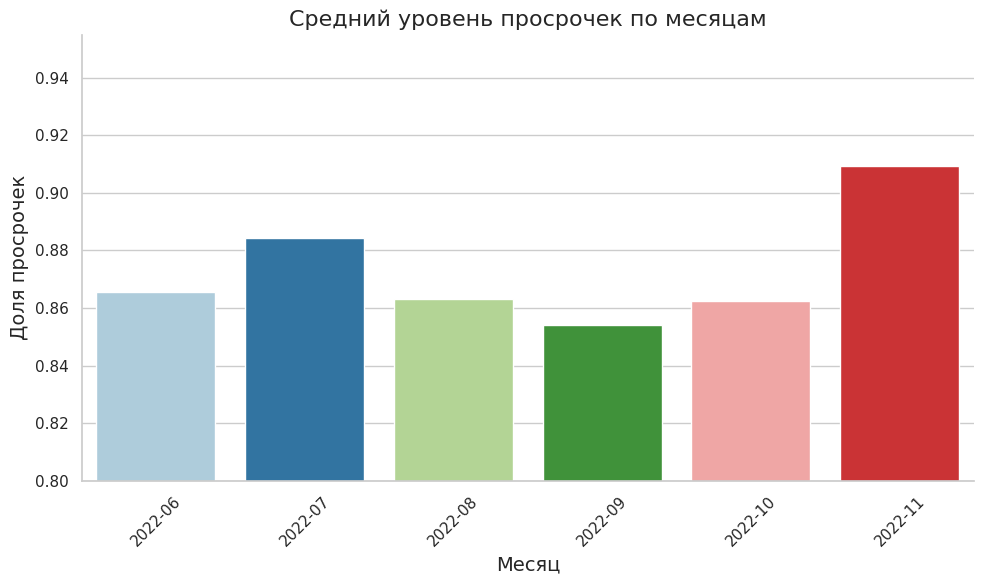

In [ ]:
import seaborn as sns

sns.set_theme(style="whitegrid")
plot = sns.barplot(
    data=overdue_by_month,
    palette='Paired'
)
plot.set_title('Средний уровень просрочек по месяцам', fontsize=16)
plot.set_xlabel('Месяц', fontsize=14)
plot.set_ylabel('Доля просрочек', fontsize=14)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set_ylim(0.8, None)
plot.figure.set_size_inches(10, 6)

sns.despine()
plot.figure.tight_layout()
plot.figure.show()

Вывод: с июня по ноябрь 2022 года среднее количество просрочек с каждым месяцем увеличивалось. на ~4.4%.

Аналогично можно посмотреть данные по неделям. Здесь для большей наглядности ограничим нижнюю границу `overdue_by_month` 0.7

In [ ]:
data['week'] = data['plan_at'].dt.to_period('W')
overdue_by_week = data.groupby('week')['is_overdue'].mean()
overdue_by_week

,is_overdue
week,
2022-05-30/2022-06-05,0.806004
2022-06-06/2022-06-12,0.831459
2022-06-13/2022-06-19,0.864698
2022-06-20/2022-06-26,0.884094
2022-06-27/2022-07-03,0.892539
2022-07-04/2022-07-10,0.900418
2022-07-11/2022-07-17,0.881713
2022-07-18/2022-07-24,0.880342
2022-07-25/2022-07-31,0.874327


<ipython-input-13-1158d4b6d56a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(
<ipython-input-13-1158d4b6d56a>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


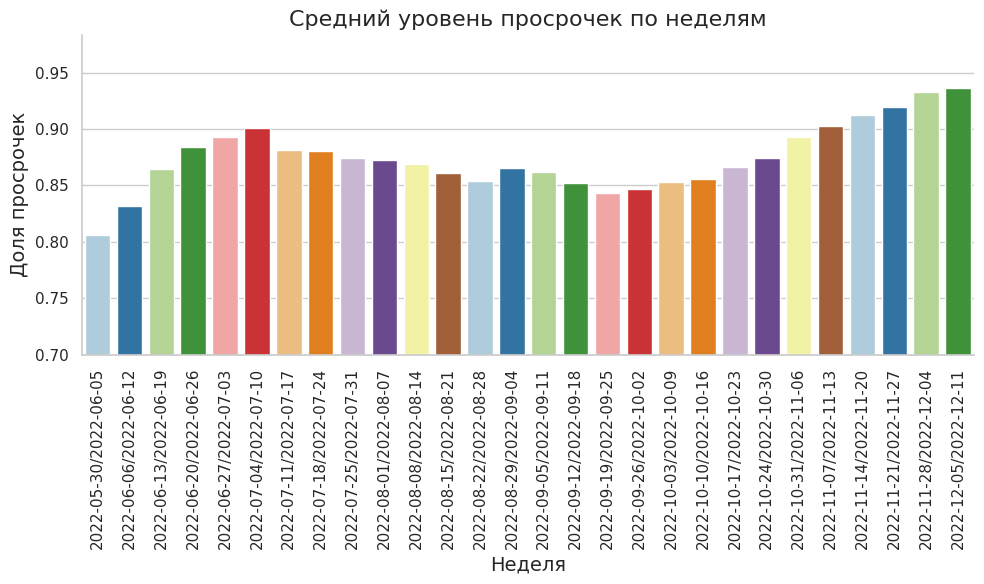

In [ ]:
plot = sns.barplot(
    data=overdue_by_week,
    palette='Paired'
)
plot.set_title('Средний уровень просрочек по неделям', fontsize=16)
plot.set_xlabel('Неделя', fontsize=14)
plot.set_ylabel('Доля просрочек', fontsize=14)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_ylim(0.7, None)
plot.figure.set_size_inches(10, 6)
sns.despine()
plot.figure.tight_layout()
plot.figure.show()